### Imports

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

### Utils

In [61]:
DIR_LOC="./logs/"

def read_seq(name):
    with open(DIR_LOC+name+'.txt', 'r') as file:
        data = file.read()

    return [[float(val) for val in exp.split(' ') if val != ''] for exp in data.split('\n\n') if exp != '']

def flatten(l):
    return [i for s in l for i in s]

def plot_series(series, fname, yname, xname):
    # Creating df
    n_trials = len(series)
    n_epochs = len(series[0])
    l_epochs = list(range(1,n_epochs+1))
    epoch_col = l_epochs*n_trials

    flat_vals = flatten(series)

    df_dict = {xname: epoch_col, yname: flat_vals}
    df = pd.DataFrame(df_dict)

    # Plotting stuff
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(6,4)})
    sns.lineplot(x=xname, y=yname, data=df)

    plt.xticks(l_epochs)

    # Saving figures
    plt.savefig('./logs/graphs/'+fname+'.svg', bbox_inches='tight')
    plt.savefig('./logs/graphs/'+fname+'.pgf', bbox_inches='tight')

def plot_log(fname, yname, xname='Epoch'):
    series = read_seq(fname)
    plot_series(series, fname, yname, xname)

def cmp_speedup(fname_parallel, fname_baseline):
    # Computing average baseline
    series_baseline = read_seq(fname_baseline)
    avg_t = np.mean(flatten(series_baseline))

    # Computing average times
    series_parallel = read_seq(fname_parallel) 
    series_parallel = np.array([np.mean(l) for l in series_parallel])

    speedups = series_parallel/avg_t

    return speedups


### Plotting

In [62]:
cmp_speedup("param_avg_N2_k0_B64_time", "param_avg_N2_k0_B64_time")

5290.4


array([0.8811432, 1.1188568])

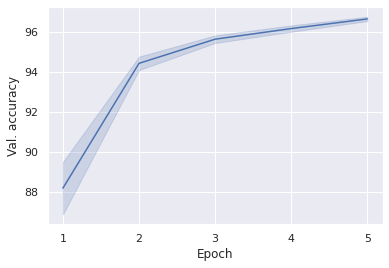

In [50]:
plot_log("param_avg_N2_k1_B64_acc", "Val. accuracy")

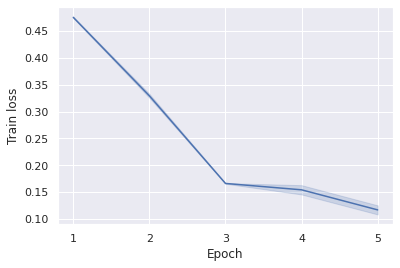

In [47]:
plot_log("param_avg_N2_k1_B64_loss", "Train loss")

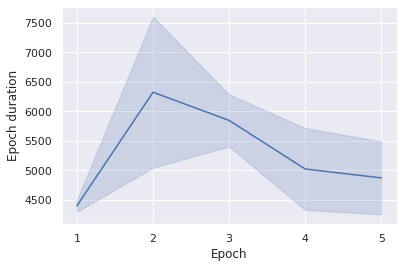

In [48]:
plot_log("param_avg_N2_k0_B64_time", "Epoch duration")